In [1]:
import sys
import os
# Get parent of current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add it to sys.path
sys.path.insert(0, parent_dir)
import numpy as np
import torch
import matplotlib.pyplot as plt
from ST_Operator import ST_Operator

%load_ext autoreload
%autoreload 2

shape data = (256, 256)
shape data_full = (20, 256, 256)


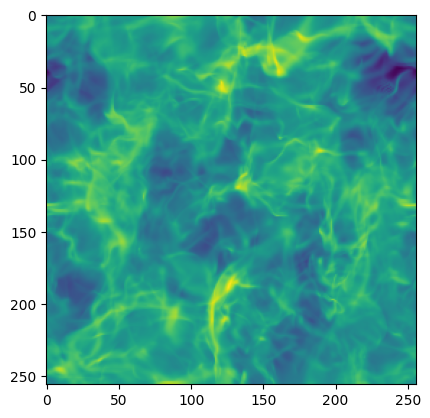

In [2]:
# Load some data
data_full = np.load("Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [3]:
from STL_2D_FFT_Torch import STL_2D_FFT_Torch as STLDataClass
# Initialization of StlData for MR=False
stl_data = STLDataClass(data)

In [4]:
vars(stl_data)

{'array': tensor([[20.1753, 20.1603, 20.1411,  ..., 20.1628, 20.1684, 20.1840],
         [20.1410, 20.1371, 20.1369,  ..., 20.1435, 20.1255, 20.1532],
         [20.1368, 20.1340, 20.1359,  ..., 20.1287, 20.1163, 20.1409],
         ...,
         [20.2385, 20.1890, 20.1470,  ..., 20.3206, 20.3140, 20.2882],
         [20.2286, 20.1976, 20.1556,  ..., 20.2404, 20.2510, 20.2498],
         [20.2046, 20.1793, 20.1461,  ..., 20.1950, 20.2152, 20.2231]],
        dtype=torch.float64),
 'fourier_status': False,
 'DT': '2D_FFT_Torch',
 'MR': False,
 'dg': 0,
 'N0': (256, 256)}

In [13]:
# --- parameters ---
J = 4
L = 2
N0 = stl_data.N0

stl_op = ST_Operator(data=stl_data, J=J, L=L, WType='Crappy',
    SC="ScatCov", jmin=0, jmax=4, dj=4,
)

In [14]:
print("For stl_op:")
print("DT = " + str(stl_op.DT))
print("N0 = " + str(stl_op.N0))
print("J = " + str(stl_op.J))
print("L = " + str(stl_op.L))
print("WType = " + str(stl_op.WType))
print("SC = " + str(stl_op.SC))
print("jmin =" + str(stl_op.jmin))
print("jmax =" + str(stl_op.jmax))
print("dj =" + str(stl_op.dj))
print("pbc =" + str(stl_op.pbc))
#print("mask =" + str(stl_op.mask))
print("norm =" + str(stl_op.norm))
print("S2_ref =" + str(stl_op.S2_ref))
print("iso =" + str(stl_op.iso))
print("angular_ft =" + str(stl_op.angular_ft))
print("scale_ft =" + str(stl_op.scale_ft))
print("flatten =" + str(stl_op.flatten))
print("mask_st =" + str(stl_op.mask_st))



For stl_op:
DT = 2D_FFT_Torch
N0 = (256, 256)
J = 2
L = 4
WType = Crappy
SC = ScatCov
jmin =0
jmax =4
dj =4
pbc =True
norm =S2
S2_ref =None
iso =False
angular_ft =False
scale_ft =False
flatten =False
mask_st =None


IndexError: index 2 is out of bounds for dimension 0 with size 2

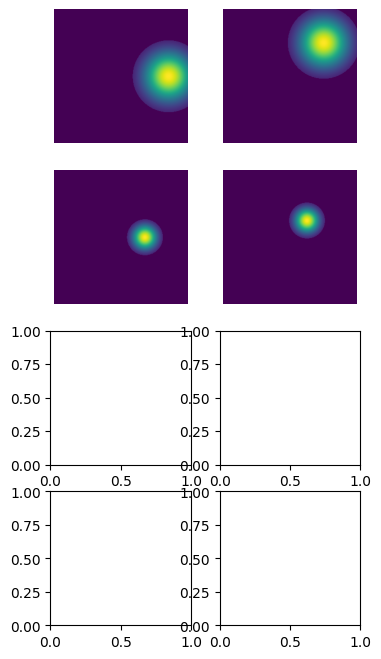

In [15]:
# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(stl_op.wavelet_op.wavelet_array[j, l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

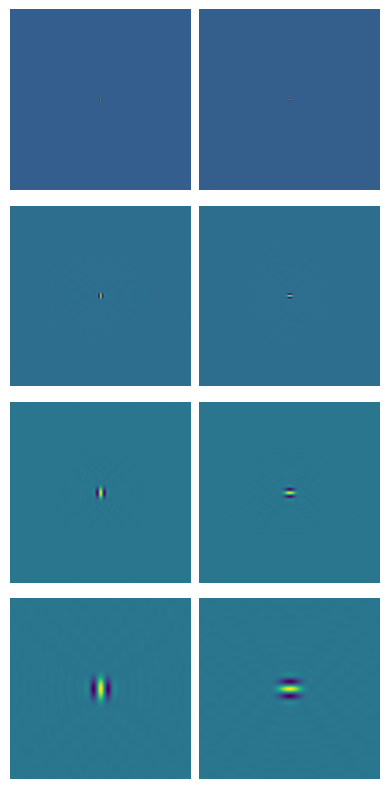

In [8]:
# Plot the wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(stl_op.wavelet_op.wavelet_array[j, l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

dg = 0
shape data after downsampling = torch.Size([256, 256])
dg = 1
shape data after downsampling = torch.Size([128, 128])
dg = 2
shape data after downsampling = torch.Size([64, 64])
dg = 3
shape data after downsampling = torch.Size([32, 32])
dg = 4
shape data after downsampling = torch.Size([16, 16])
dg = 5
shape data after downsampling = torch.Size([16, 16])


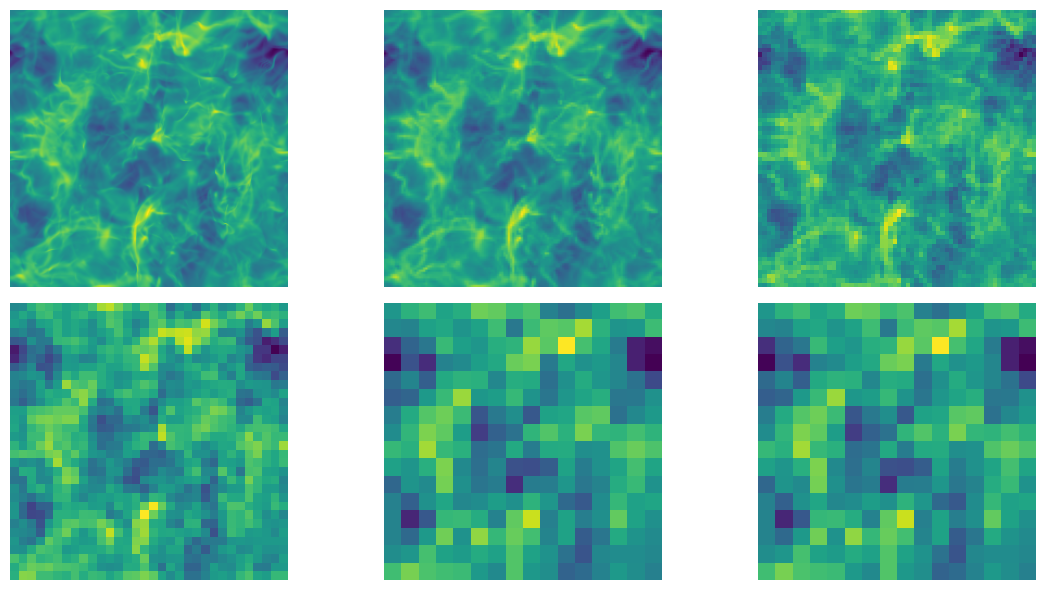

In [9]:
# Test of the downsample function

# Prepare plot
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

# perform 6 downgrading and plot
for dg, ax in enumerate(axes):
    print("dg = " + str(dg))
    stl_data_dg = stl_data.downsample(dg, copy=True, O_Fourier=False)
    print("shape data after downsampling = " + str(stl_data_dg.array.shape))
    ax.imshow(stl_data_dg.array)
    ax.axis('off') 
plt.tight_layout()
plt.show()

In [10]:
stl_stat = stl_op.apply(stl_data)


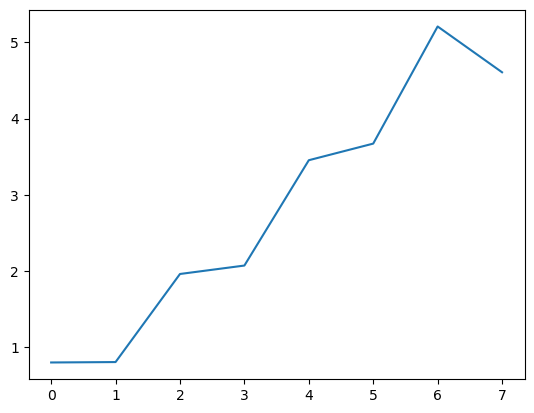

In [11]:
plt.plot(stl_stat.S1.numpy().reshape(-1))

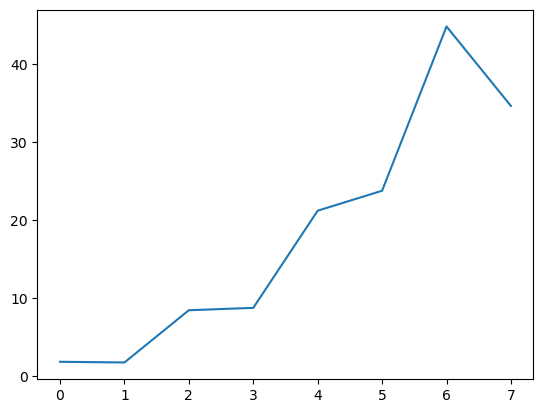

In [12]:
plt.plot(stl_stat.S2.numpy().reshape(-1))

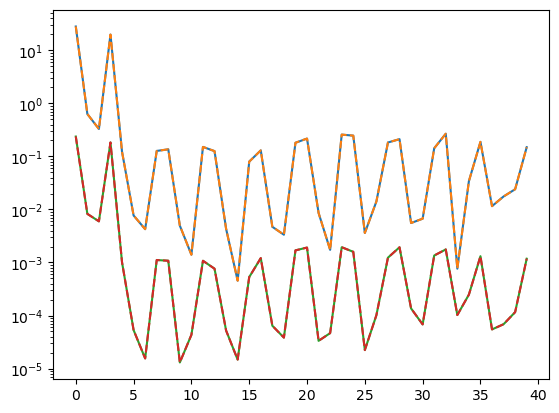

In [13]:
def get_coefs(x,dropna=True):
    coefs = x.numpy().reshape(-1)
    if dropna == True:
        coefs = coefs[~np.isnan(coefs)]
    return coefs


S3_1 = get_coefs(stl_stat.S3_1)
S3_2 = get_coefs(stl_stat.S3_2)
S3_3 = get_coefs(stl_stat.S3_3)
S3_4 = get_coefs(stl_stat.S3_4)

plt.plot(abs(S3_1))
plt.plot(abs(S3_2), ls='--')
plt.plot(abs(S3_3))
plt.plot(abs(S3_4), ls='--')
plt.yscale('log')

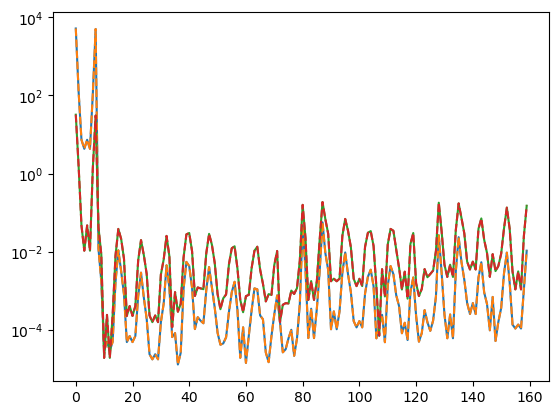

In [14]:
S4_1 = get_coefs(stl_stat.S4_1)
S4_2 = get_coefs(stl_stat.S4_2)
S4_3 = get_coefs(stl_stat.S4_3)
S4_4 = get_coefs(stl_stat.S4_4)

plt.plot(abs(S4_1))
plt.plot(abs(S4_2), ls='--')
plt.plot(abs(S4_3))
plt.plot(abs(S4_4), ls='--')
plt.yscale('log')